In [1]:
pwd

In [ ]:
!pip install pandas

In [2]:
cd Project1

In [3]:
import json
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
currPath = 'D:\\대학\\3-2\\IT집중교육1\\Project1'
file_list = os.listdir(currPath)
file_list

In [ ]:
fileName = file_list[0]
fileName

In [ ]:
allGames = []
for fileName in tqdm(file_list):
    with open (fileName, "r", encoding='utf-8') as f:
        data = json.load(f)
        for dat in data:
            flag = 0
            for i in range(len(allGames)):
                if allGames[i] == dat:
                    flag = 1
                    break
            if flag == 0:
                allGames.append(dat)

In [ ]:
len(allGames)

In [ ]:
for i in range(200):
    print(allGames[i]['gameType'])

In [ ]:
onlySoleRank = []
for i in allGames:
    if i['gameType'] == '솔랭':
        onlySoleRank.append(i)

In [ ]:
len(onlySoleRank)

In [ ]:
type(onlySoleRank)

In [ ]:
with open('AllSoleRankData.json', 'a', encoding='utf-8') as json_file:
    json.dump(onlySoleRank, json_file, indent='\t', ensure_ascii=False)

In [ ]:
with open ('AllSoleRankData.json', "r", encoding='utf-8') as f:
    data = json.load(f)

In [ ]:
data

In [ ]:
type(data)

In [ ]:
keys = ['champion', 'spell1', 'spell2', 'rune1', 'rune2', 'user name', 'kill', 'death', 'assist', 'kill participation', 'kda', 'damage dealt', 'damage taken', 'control ward', 'warding', 'ward removed', 'total cs', 'cs per minute', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7']
arr1 = ['wp1', 'wp2', 'wp3', 'wp4', 'wp5', 'lp1', 'lp2', 'lp3', 'lp4', 'lp5']

colNames = []
for player in arr1:
    for key in keys:
        colNames.append(player + '_' + key)
colNames
len(colNames)

In [ ]:
# 하나의 게임 dictionary정보를 list안에 모두 넣어주는 함수
def dictToList(gameInfoDict):
    DF = pd.DataFrame(gameInfoDict)
    arr = []
    for i in range(1, 6):
        arr = arr + list(DF['win player' + str(i)])
        for j in range(25 - len(list(DF['win player' + str(i)]))):
            arr.append(np.nan)
    for i in range(1, 6):
        arr = arr + list(DF['lose player' + str(i)])
        for j in range(25 - len(list(DF['lose player' + str(i)]))):
            arr.append(np.nan)
    return arr

In [ ]:
dictToList(data[0])

In [ ]:
allDataList = []
for i in range(250):
    allDataList.append([])
allDataList[0]

In [ ]:
for i in tqdm(range(len(data))):
    dataList = dictToList(data[i])
    for i in range(250):
        allDataList[i].append(dataList[i])

In [ ]:
allDataDF = pd.DataFrame(allDataList)

In [ ]:
allDataDF.index = colNames

In [ ]:
allDataDF

In [ ]:
allSoleRankDict = allDataDF.to_dict()

In [ ]:
allSoleRankDict

In [ ]:
with open('AllSoleRankDict.json', 'a', encoding='utf-8') as json_file:
    json.dump(allSoleRankDict, json_file, indent='\t', ensure_ascii=False)

In [4]:
with open ('AllSoleRankDict.json', "r", encoding='utf-8') as f:
    dataDict = json.load(f)

In [5]:
allDataDF = pd.DataFrame.from_dict(dataDict)

In [6]:
listForClust = []
for i in range(5):
    listForClust.append('wp' + str(i + 1) + '_' + 'kill')
    listForClust.append('wp' + str(i + 1) + '_' + 'death')
    listForClust.append('wp' + str(i + 1) + '_' + 'assist')
    listForClust.append('wp' + str(i + 1) + '_' + 'kill participation')
    listForClust.append('wp' + str(i + 1) + '_' + 'kda')
    listForClust.append('wp' + str(i + 1) + '_' + 'damage dealt')
    listForClust.append('wp' + str(i + 1) + '_' + 'damage taken')
    listForClust.append('wp' + str(i + 1) + '_' + 'control ward')
    listForClust.append('wp' + str(i + 1) + '_' + 'warding')
    listForClust.append('wp' + str(i + 1) + '_' + 'ward removed')
    listForClust.append('wp' + str(i + 1) + '_' + 'total cs')
    listForClust.append('wp' + str(i + 1) + '_' + 'cs per minute')
    
for i in range(5):
    listForClust.append('lp' + str(i + 1) + '_' + 'kill')
    listForClust.append('lp' + str(i + 1) + '_' + 'death')
    listForClust.append('lp' + str(i + 1) + '_' + 'assist')
    listForClust.append('lp' + str(i + 1) + '_' + 'kill participation')
    listForClust.append('lp' + str(i + 1) + '_' + 'kda')
    listForClust.append('lp' + str(i + 1) + '_' + 'damage dealt')
    listForClust.append('lp' + str(i + 1) + '_' + 'damage taken')
    listForClust.append('lp' + str(i + 1) + '_' + 'control ward')
    listForClust.append('lp' + str(i + 1) + '_' + 'warding')
    listForClust.append('lp' + str(i + 1) + '_' + 'ward removed')
    listForClust.append('lp' + str(i + 1) + '_' + 'total cs')
    listForClust.append('lp' + str(i + 1) + '_' + 'cs per minute')

In [7]:
listForClust

['wp1_kill',
 'wp1_death',
 'wp1_assist',
 'wp1_kill participation',
 'wp1_kda',
 'wp1_damage dealt',
 'wp1_damage taken',
 'wp1_control ward',
 'wp1_warding',
 'wp1_ward removed',
 'wp1_total cs',
 'wp1_cs per minute',
 'wp2_kill',
 'wp2_death',
 'wp2_assist',
 'wp2_kill participation',
 'wp2_kda',
 'wp2_damage dealt',
 'wp2_damage taken',
 'wp2_control ward',
 'wp2_warding',
 'wp2_ward removed',
 'wp2_total cs',
 'wp2_cs per minute',
 'wp3_kill',
 'wp3_death',
 'wp3_assist',
 'wp3_kill participation',
 'wp3_kda',
 'wp3_damage dealt',
 'wp3_damage taken',
 'wp3_control ward',
 'wp3_warding',
 'wp3_ward removed',
 'wp3_total cs',
 'wp3_cs per minute',
 'wp4_kill',
 'wp4_death',
 'wp4_assist',
 'wp4_kill participation',
 'wp4_kda',
 'wp4_damage dealt',
 'wp4_damage taken',
 'wp4_control ward',
 'wp4_warding',
 'wp4_ward removed',
 'wp4_total cs',
 'wp4_cs per minute',
 'wp5_kill',
 'wp5_death',
 'wp5_assist',
 'wp5_kill participation',
 'wp5_kda',
 'wp5_damage dealt',
 'wp5_damage taken

In [8]:
allDataDFTrans = allDataDF.transpose()

In [9]:
dfForClustering = allDataDFTrans[listForClust]

In [10]:
dfForClustering

,wp1_kill,wp1_death,wp1_assist,wp1_kill participation,wp1_kda,wp1_damage dealt,wp1_damage taken,wp1_control ward,wp1_warding,wp1_ward removed,...,lp5_assist,lp5_kill participation,lp5_kda,lp5_damage dealt,lp5_damage taken,lp5_control ward,lp5_warding,lp5_ward removed,lp5_total cs,lp5_cs per minute
0,16,4,3,54%,4.75,"34,721","45,237",2,6,1,...,13,67%,7.0,"10,203","10,251",10,34,17,24,0.9
1,3,5,2,18%,1.0,"13,543","17,496",1,6,1,...,2,40%,0.5,"8,929","12,141",3,27,6,22,1.1
2,5,1,8,52%,13.0,"13,516","13,051",1,5,1,...,3,33%,0.5,"12,099","11,914",2,19,6,23,1.1
3,1,3,1,50%,0.67,"6,847","15,340",1,7,3,...,7,50%,9.0,"5,256","3,758",6,15,5,5,0.3
4,1,6,0,25%,0.17,"6,140","10,945",0,2,0,...,7,36%,Perfect,"3,401","4,900",2,10,3,22,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61624,7,3,6,37%,4.33,"14,454","16,577",3,10,2,...,7,50%,0.73,"8,613","20,993",9,35,2,36,1.3
61625,2,0,6,35%,Perfect,"12,740","13,764",2,10,2,...,4,67%,0.8,"4,044","13,125",4,18,2,11,0.5
61626,3,3,3,27%,2.0,"11,903","21,139",2,5,4,...,22,77%,7.67,"7,867","6,743",8,26,5,8,0.3
61627,5,4,6,26%,2.75,"15,339","16,289",4,8,0,...,6,59%,0.83,"9,394","25,690",0,6,2,18,0.9


In [11]:
wp1_killParticipationList = list(dfForClustering['wp1_kill participation'])
wp2_killParticipationList = list(dfForClustering['wp2_kill participation'])
wp3_killParticipationList = list(dfForClustering['wp3_kill participation'])
wp4_killParticipationList = list(dfForClustering['wp4_kill participation'])
wp5_killParticipationList = list(dfForClustering['wp5_kill participation'])
lp1_killParticipationList = list(dfForClustering['lp1_kill participation'])
lp2_killParticipationList = list(dfForClustering['lp2_kill participation'])
lp3_killParticipationList = list(dfForClustering['lp3_kill participation'])
lp4_killParticipationList = list(dfForClustering['lp4_kill participation'])
lp5_killParticipationList = list(dfForClustering['lp5_kill participation'])

for i in tqdm(range(len(wp1_killParticipationList))):
    wp1_killParticipationList[i] = wp1_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(wp2_killParticipationList))):
    wp2_killParticipationList[i] = wp2_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(wp3_killParticipationList))):
    wp3_killParticipationList[i] = wp3_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(wp4_killParticipationList))):
    wp4_killParticipationList[i] = wp4_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(wp5_killParticipationList))):
    wp5_killParticipationList[i] = wp5_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(lp1_killParticipationList))):
    lp1_killParticipationList[i] = lp1_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(lp2_killParticipationList))):
    lp2_killParticipationList[i] = lp2_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(lp3_killParticipationList))):
    lp3_killParticipationList[i] = lp3_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(lp4_killParticipationList))):
    lp4_killParticipationList[i] = lp4_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(lp5_killParticipationList))):
    lp5_killParticipationList[i] = lp5_killParticipationList[i].split('%')[0]
    
dfForClustering['wp1_kill participation'] = wp1_killParticipationList
dfForClustering['wp2_kill participation'] = wp2_killParticipationList
dfForClustering['wp3_kill participation'] = wp3_killParticipationList
dfForClustering['wp4_kill participation'] = wp4_killParticipationList
dfForClustering['wp5_kill participation'] = wp5_killParticipationList
dfForClustering['lp1_kill participation'] = lp1_killParticipationList
dfForClustering['lp2_kill participation'] = lp2_killParticipationList
dfForClustering['lp3_kill participation'] = lp3_killParticipationList
dfForClustering['lp4_kill participation'] = lp4_killParticipationList
dfForClustering['lp5_kill participation'] = lp5_killParticipationList

100%|████████████████████████████████████████████████████████████████████████| 61629/61629 [00:00<00:00, 605903.99it/s]
C:\Users\txepa\AppData\Local\Temp\ipykernel_9944\34727043.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp1_kill participation'] = wp1_killParticipationList
C:\Users\txepa\AppData\Local\Temp\ipykernel_9944\34727043.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp2_kill participation'] = wp2_killParticipationList
C:\Users\txepa\AppData\Local\T

In [12]:
wp1_kdaList = list(dfForClustering['wp1_kda'])
wp2_kdaList = list(dfForClustering['wp2_kda'])
wp3_kdaList = list(dfForClustering['wp3_kda'])
wp4_kdaList = list(dfForClustering['wp4_kda'])
wp5_kdaList = list(dfForClustering['wp5_kda'])
lp1_kdaList = list(dfForClustering['lp1_kda'])
lp2_kdaList = list(dfForClustering['lp2_kda'])
lp3_kdaList = list(dfForClustering['lp3_kda'])
lp4_kdaList = list(dfForClustering['lp4_kda'])
lp5_kdaList = list(dfForClustering['lp5_kda'])

for i in tqdm(range(len(wp1_kdaList))):
    if wp1_kdaList[i] == 'Perfect':
        wp1_kdaList[i] = int(dfForClustering.loc[str(i), 'wp1_kill']) + int(dfForClustering.loc[str(i), 'wp1_assist'])
for i in tqdm(range(len(wp2_kdaList))):
    if wp2_kdaList[i] == 'Perfect':
        wp2_kdaList[i] = int(dfForClustering.loc[str(i), 'wp2_kill']) + int(dfForClustering.loc[str(i), 'wp2_assist'])
for i in tqdm(range(len(wp3_kdaList))):
    if wp3_kdaList[i] == 'Perfect':
        wp3_kdaList[i] = int(dfForClustering.loc[str(i), 'wp3_kill']) + int(dfForClustering.loc[str(i), 'wp3_assist'])
for i in tqdm(range(len(wp4_kdaList))):
    if wp4_kdaList[i] == 'Perfect':
        wp4_kdaList[i] = int(dfForClustering.loc[str(i), 'wp4_kill']) + int(dfForClustering.loc[str(i), 'wp4_assist'])
for i in tqdm(range(len(wp5_kdaList))):
    if wp5_kdaList[i] == 'Perfect':
        wp5_kdaList[i] = int(dfForClustering.loc[str(i), 'wp5_kill']) + int(dfForClustering.loc[str(i), 'wp5_assist'])
        
for i in tqdm(range(len(lp1_kdaList))):
    if lp1_kdaList[i] == 'Perfect':
        lp1_kdaList[i] = int(dfForClustering.loc[str(i), 'lp1_kill']) + int(dfForClustering.loc[str(i), 'lp1_assist'])
for i in tqdm(range(len(lp2_kdaList))):
    if lp2_kdaList[i] == 'Perfect':
        lp2_kdaList[i] = int(dfForClustering.loc[str(i), 'lp2_kill']) + int(dfForClustering.loc[str(i), 'lp2_assist'])
for i in tqdm(range(len(lp3_kdaList))):
    if lp3_kdaList[i] == 'Perfect':
        lp3_kdaList[i] = int(dfForClustering.loc[str(i), 'lp3_kill']) + int(dfForClustering.loc[str(i), 'lp3_assist'])
for i in tqdm(range(len(lp4_kdaList))):
    if lp4_kdaList[i] == 'Perfect':
        lp4_kdaList[i] = int(dfForClustering.loc[str(i), 'lp4_kill']) + int(dfForClustering.loc[str(i), 'lp4_assist'])
for i in tqdm(range(len(lp5_kdaList))):
    if lp5_kdaList[i] == 'Perfect':
        lp5_kdaList[i] = int(dfForClustering.loc[str(i), 'lp5_kill']) + int(dfForClustering.loc[str(i), 'lp5_assist'])

dfForClustering['wp1_kda'] = wp1_kdaList
dfForClustering['wp2_kda'] = wp2_kdaList
dfForClustering['wp3_kda'] = wp3_kdaList
dfForClustering['wp4_kda'] = wp4_kdaList
dfForClustering['wp5_kda'] = wp5_kdaList
dfForClustering['lp1_kda'] = lp1_kdaList
dfForClustering['lp2_kda'] = lp2_kdaList
dfForClustering['lp3_kda'] = lp3_kdaList
dfForClustering['lp4_kda'] = lp4_kdaList
dfForClustering['lp5_kda'] = lp5_kdaList

100%|████████████████████████████████████████████████████████████████████████| 61629/61629 [00:00<00:00, 936272.38it/s]
C:\Users\txepa\AppData\Local\Temp\ipykernel_9944\3118855033.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp1_kda'] = wp1_kdaList
C:\Users\txepa\AppData\Local\Temp\ipykernel_9944\3118855033.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp2_kda'] = wp2_kdaList
C:\Users\txepa\AppData\Local\Temp\ipykernel_9944\3118855033.py:46: SettingWithCopyWa

In [13]:
wp1_damageDealtList = list(dfForClustering['wp1_damage dealt'])
wp2_damageDealtList = list(dfForClustering['wp2_damage dealt'])
wp3_damageDealtList = list(dfForClustering['wp3_damage dealt'])
wp4_damageDealtList = list(dfForClustering['wp4_damage dealt'])
wp5_damageDealtList = list(dfForClustering['wp5_damage dealt'])
lp1_damageDealtList = list(dfForClustering['lp1_damage dealt'])
lp2_damageDealtList = list(dfForClustering['lp2_damage dealt'])
lp3_damageDealtList = list(dfForClustering['lp3_damage dealt'])
lp4_damageDealtList = list(dfForClustering['lp4_damage dealt'])
lp5_damageDealtList = list(dfForClustering['lp5_damage dealt'])

for i in tqdm(range(len(wp1_damageDealtList))):
    wp1_damageDealtList[i] = wp1_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(wp2_damageDealtList))):
    wp2_damageDealtList[i] = wp2_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(wp3_damageDealtList))):
    wp3_damageDealtList[i] = wp3_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(wp4_damageDealtList))):
    wp4_damageDealtList[i] = wp4_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(wp5_damageDealtList))):
    wp5_damageDealtList[i] = wp5_damageDealtList[i].replace(',', '')
    
for i in tqdm(range(len(lp1_damageDealtList))):
    lp1_damageDealtList[i] = lp1_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(lp2_damageDealtList))):
    lp2_damageDealtList[i] = lp2_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(lp3_damageDealtList))):
    lp3_damageDealtList[i] = lp3_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(lp4_damageDealtList))):
    lp4_damageDealtList[i] = lp4_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(lp5_damageDealtList))):
    lp5_damageDealtList[i] = lp5_damageDealtList[i].replace(',', '')
    
dfForClustering['wp1_damage dealt'] = wp1_damageDealtList
dfForClustering['wp2_damage dealt'] = wp2_damageDealtList
dfForClustering['wp3_damage dealt'] = wp3_damageDealtList
dfForClustering['wp4_damage dealt'] = wp4_damageDealtList
dfForClustering['wp5_damage dealt'] = wp5_damageDealtList

dfForClustering['lp1_damage dealt'] = lp1_damageDealtList
dfForClustering['lp2_damage dealt'] = lp2_damageDealtList
dfForClustering['lp3_damage dealt'] = lp3_damageDealtList
dfForClustering['lp4_damage dealt'] = lp4_damageDealtList
dfForClustering['lp5_damage dealt'] = lp5_damageDealtList

100%|███████████████████████████████████████████████████████████████████████| 61629/61629 [00:00<00:00, 1624961.57it/s]
C:\Users\txepa\AppData\Local\Temp\ipykernel_9944\3518384700.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp1_damage dealt'] = wp1_damageDealtList
C:\Users\txepa\AppData\Local\Temp\ipykernel_9944\3518384700.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp2_damage dealt'] = wp2_damageDealtList
C:\Users\txepa\AppData\Local\Temp\ipykernel_9944\3

In [14]:
wp1_damageTakenList = list(dfForClustering['wp1_damage taken'])
wp2_damageTakenList = list(dfForClustering['wp2_damage taken'])
wp3_damageTakenList = list(dfForClustering['wp3_damage taken'])
wp4_damageTakenList = list(dfForClustering['wp4_damage taken'])
wp5_damageTakenList = list(dfForClustering['wp5_damage taken'])

lp1_damageTakenList = list(dfForClustering['lp1_damage taken'])
lp2_damageTakenList = list(dfForClustering['lp2_damage taken'])
lp3_damageTakenList = list(dfForClustering['lp3_damage taken'])
lp4_damageTakenList = list(dfForClustering['lp4_damage taken'])
lp5_damageTakenList = list(dfForClustering['lp5_damage taken'])

for i in tqdm(range(len(wp1_damageTakenList))):
    wp1_damageTakenList[i] = wp1_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(wp2_damageTakenList))):
    wp2_damageTakenList[i] = wp2_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(wp3_damageTakenList))):
    wp3_damageTakenList[i] = wp3_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(wp4_damageTakenList))):
    wp4_damageTakenList[i] = wp4_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(wp5_damageTakenList))):
    wp5_damageTakenList[i] = wp5_damageTakenList[i].replace(',', '')
    
for i in tqdm(range(len(lp1_damageTakenList))):
    lp1_damageTakenList[i] = lp1_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(lp2_damageTakenList))):
    lp2_damageTakenList[i] = lp2_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(lp3_damageTakenList))):
    lp3_damageTakenList[i] = lp3_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(lp4_damageTakenList))):
    lp4_damageTakenList[i] = lp4_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(lp5_damageTakenList))):
    lp5_damageTakenList[i] = lp5_damageTakenList[i].replace(',', '')
    
dfForClustering['wp1_damage taken'] = wp1_damageTakenList
dfForClustering['wp2_damage taken'] = wp2_damageTakenList
dfForClustering['wp3_damage taken'] = wp3_damageTakenList
dfForClustering['wp4_damage taken'] = wp4_damageTakenList
dfForClustering['wp5_damage taken'] = wp5_damageTakenList
dfForClustering['lp1_damage taken'] = lp1_damageTakenList
dfForClustering['lp2_damage taken'] = lp2_damageTakenList
dfForClustering['lp3_damage taken'] = lp3_damageTakenList
dfForClustering['lp4_damage taken'] = lp4_damageTakenList
dfForClustering['lp5_damage taken'] = lp5_damageTakenList

100%|███████████████████████████████████████████████████████████████████████| 61629/61629 [00:00<00:00, 1496770.46it/s]
C:\Users\txepa\AppData\Local\Temp\ipykernel_9944\1436440457.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp1_damage taken'] = wp1_damageTakenList
C:\Users\txepa\AppData\Local\Temp\ipykernel_9944\1436440457.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp2_damage taken'] = wp2_damageTakenList
C:\Users\txepa\AppData\Local\Temp\ipykernel_9944\1

In [15]:
dfForClustering

,wp1_kill,wp1_death,wp1_assist,wp1_kill participation,wp1_kda,wp1_damage dealt,wp1_damage taken,wp1_control ward,wp1_warding,wp1_ward removed,...,lp5_assist,lp5_kill participation,lp5_kda,lp5_damage dealt,lp5_damage taken,lp5_control ward,lp5_warding,lp5_ward removed,lp5_total cs,lp5_cs per minute
0,16,4,3,54,4.75,34721,45237,2,6,1,...,13,67,7.00,10203,10251,10,34,17,24,0.9
1,3,5,2,18,1.00,13543,17496,1,6,1,...,2,40,0.50,8929,12141,3,27,6,22,1.1
2,5,1,8,52,13.00,13516,13051,1,5,1,...,3,33,0.50,12099,11914,2,19,6,23,1.1
3,1,3,1,50,0.67,6847,15340,1,7,3,...,7,50,9.00,5256,3758,6,15,5,5,0.3
4,1,6,0,25,0.17,6140,10945,0,2,0,...,7,36,9.00,3401,4900,2,10,3,22,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61624,7,3,6,37,4.33,14454,16577,3,10,2,...,7,50,0.73,8613,20993,9,35,2,36,1.3
61625,2,0,6,35,8.00,12740,13764,2,10,2,...,4,67,0.80,4044,13125,4,18,2,11,0.5
61626,3,3,3,27,2.00,11903,21139,2,5,4,...,22,77,7.67,7867,6743,8,26,5,8,0.3
61627,5,4,6,26,2.75,15339,16289,4,8,0,...,6,59,0.83,9394,25690,0,6,2,18,0.9


In [16]:
colArr1 = []

for i in range(5):
    colArr1.append('p' + str(i + 1) + '_' + 'kill')
    colArr1.append('p' + str(i + 1) + '_' + 'death')
    colArr1.append('p' + str(i + 1) + '_' + 'assist')
    colArr1.append('p' + str(i + 1) + '_' + 'kill participation')
    colArr1.append('p' + str(i + 1) + '_' + 'kda')
    colArr1.append('p' + str(i + 1) + '_' + 'damage dealt')
    colArr1.append('p' + str(i + 1) + '_' + 'damage taken')
    colArr1.append('p' + str(i + 1) + '_' + 'control ward')
    colArr1.append('p' + str(i + 1) + '_' + 'warding')
    colArr1.append('p' + str(i + 1) + '_' + 'ward removed')
    colArr1.append('p' + str(i + 1) + '_' + 'total cs')
    colArr1.append('p' + str(i + 1) + '_' + 'cs per minute')

In [17]:
dfOne = pd.DataFrame()
for i in range(60):
    arr = list(dfForClustering[listForClust[i]]) + list(dfForClustering[listForClust[i + 60]])
    dfOne[colArr1[i]] = arr
    

In [18]:
winLose = []
for i in range(61629):
    winLose.append(1)
for i in range(61629):
    winLose.append(0)

In [19]:
dfOne['winLose'] = winLose

In [20]:
for i in colArr1:
    dfOne[i] = dfOne[i].astype('float')

In [21]:
dfOne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123258 entries, 0 to 123257
Data columns (total 61 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   p1_kill                123258 non-null  float64
 1   p1_death               123258 non-null  float64
 2   p1_assist              123258 non-null  float64
 3   p1_kill participation  123258 non-null  float64
 4   p1_kda                 123258 non-null  float64
 5   p1_damage dealt        123258 non-null  float64
 6   p1_damage taken        123258 non-null  float64
 7   p1_control ward        123258 non-null  float64
 8   p1_warding             123258 non-null  float64
 9   p1_ward removed        123258 non-null  float64
 10  p1_total cs            123258 non-null  float64
 11  p1_cs per minute       123258 non-null  float64
 12  p2_kill                123258 non-null  float64
 13  p2_death               123258 non-null  float64
 14  p2_assist              123258 non-nu

In [61]:
dfOne.drop('winLose', axis = 1)

,p1_kill,p1_death,p1_assist,p1_kill participation,p1_kda,p1_damage dealt,p1_damage taken,p1_control ward,p1_warding,p1_ward removed,...,p5_assist,p5_kill participation,p5_kda,p5_damage dealt,p5_damage taken,p5_control ward,p5_warding,p5_ward removed,p5_total cs,p5_cs per minute
0,16.0,4.0,3.0,54.0,4.75,34721.0,45237.0,2.0,6.0,1.0,...,9.0,26.0,1.80,6799.0,14668.0,5.0,45.0,11.0,22.0,0.8
1,3.0,5.0,2.0,18.0,1.00,13543.0,17496.0,1.0,6.0,1.0,...,18.0,79.0,11.00,8182.0,11081.0,4.0,23.0,3.0,10.0,0.5
2,5.0,1.0,8.0,52.0,13.00,13516.0,13051.0,1.0,5.0,1.0,...,20.0,88.0,22.00,7951.0,9173.0,5.0,28.0,7.0,8.0,0.4
3,1.0,3.0,1.0,50.0,0.67,6847.0,15340.0,1.0,7.0,3.0,...,2.0,50.0,0.67,3741.0,6856.0,7.0,28.0,5.0,20.0,1.0
4,1.0,6.0,0.0,25.0,0.17,6140.0,10945.0,0.0,2.0,0.0,...,1.0,50.0,0.50,3724.0,7131.0,2.0,6.0,0.0,23.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123253,3.0,5.0,1.0,25.0,0.80,10438.0,18824.0,1.0,9.0,2.0,...,7.0,50.0,0.73,8613.0,20993.0,9.0,35.0,2.0,36.0,1.3
123254,0.0,4.0,0.0,0.0,0.00,8613.0,20668.0,2.0,9.0,5.0,...,4.0,67.0,0.80,4044.0,13125.0,4.0,18.0,2.0,11.0,0.5
123255,1.0,4.0,3.0,13.0,1.00,9550.0,11755.0,1.0,6.0,0.0,...,22.0,77.0,7.67,7867.0,6743.0,8.0,26.0,5.0,8.0,0.3
123256,0.0,5.0,3.0,18.0,0.60,11483.0,19572.0,2.0,6.0,2.0,...,6.0,59.0,0.83,9394.0,25690.0,0.0,6.0,2.0,18.0,0.9


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix 계산하기
corr = dfOne.corr()

# 위 삼각형에대한 마스크 생성하기
mask = np.triu(np.ones_like(corr, dtype=bool))

# matplotlib figure 설정하기
f, ax = plt.subplots(figsize=(30, 30))

# colormap 설정하기
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# heatmap 그리기
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

scaler = StandardScaler().fit_transform(dfOne)
pca = PCA(n_components=20).fit(scaler)
print(pca)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
pca_data = pca.transform(dfOne)
print(pca_data.shape)
#pipeline = make_pipeline(scaler, pca)
#pipeline.fit_transform(dfOne)
#print(pipeline)
#features = range(pca.n_components_)
#print([round(a, 4) for a in pca.explained_variance_ratio_])
#print(sum(pca.explained_variance_ratio_[:30]))
#plt.bar(features, pca.explained_variance_ratio_)
#plt.xlabel('PCA feature')
#plt.ylabel('variance')
#plt.xticks(features)
#plt.show()

PCA(n_components=20)
[0.29610509 0.09895857 0.04256747 0.0405785  0.03364443 0.03226432
 0.0308956  0.02475167 0.02247538 0.02186852 0.02120941 0.02000629
 0.01918682 0.01857818 0.01727765 0.0163215  0.01589008 0.01411282
 0.01296757 0.01245351]
0.8121133882164316
(123258, 20)


D:\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [63]:
dfTwo = pd.DataFrame(pca_data)

In [64]:
dfTwo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,40462.762065,-12102.176230,-3690.382391,-8122.764113,2809.767853,-8019.367598,544.791982,1317.284173,4599.038907,3563.945376,-10622.671066,-13133.357925,6553.940674,2570.812231,-12370.095075,-1338.783422,628.287975,-8914.037003,-5810.372192,524.060330
1,26101.479451,-7107.650003,3067.745592,-6783.753331,1719.032004,-3919.462249,-801.489515,2540.273604,3198.160557,2282.682768,-3331.457020,-9669.407928,3108.018767,2988.080906,-5526.134286,-678.432547,2224.913692,-1448.451052,133.527920,-431.327064
2,25714.499766,-6870.410569,-77.087615,-6881.841441,587.924232,-3685.089920,1464.804990,2138.378075,2272.219060,617.521056,-6747.373049,-8014.053910,2535.215323,2411.442127,-6591.808796,-580.346768,1146.632667,-2239.093394,-21.953798,4184.121140
3,18062.539463,-6456.096667,-1162.858814,-4230.744389,-225.376447,-2488.676843,1491.754636,1079.486736,952.804217,155.148063,-6220.844392,-5119.547266,1774.824260,1172.884889,-5387.302531,-367.163437,-238.430730,-2270.546746,-444.837730,3845.058346
4,15097.652033,-5417.239718,1004.051282,-3635.981606,810.178292,-2244.939675,-155.822932,950.484097,1873.864407,406.940586,-3673.415404,-5157.819338,1232.555130,1238.015005,-3922.634134,-333.104911,436.029068,-1025.400324,389.298411,1883.146973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123253,32496.966644,-11526.890425,-1154.803348,-9307.969948,-1447.413232,-3128.556289,1202.692457,3521.462750,-135.619384,699.566256,-7680.441694,-10578.930451,3208.560319,2708.407650,-7127.874400,-598.242035,1506.276208,-1844.271144,-691.254448,4520.288873
123254,26514.524104,-8267.517748,1472.728890,-6346.193562,756.675792,-2895.773481,1579.774431,457.254430,2799.623310,758.795844,-5591.639422,-9844.629851,2549.101674,2623.763407,-6269.297709,-625.679957,994.937393,-2052.625745,530.208574,3659.997241
123255,32584.879726,-10056.782566,3226.025475,-8420.541456,1112.299605,-4909.048332,2144.520717,2696.910327,3727.021216,-325.192238,-8376.189909,-10724.933440,1758.127202,3589.511341,-8263.365990,-589.743033,481.728824,-1550.406507,4210.397081,7196.953023
123256,31314.610605,-10945.234401,253.188509,-8916.218995,511.116708,-2551.551619,801.471425,2377.712442,2859.018054,668.703931,-6161.426312,-11308.389210,2751.222215,2555.820689,-6438.516419,-687.529954,2481.347026,-1120.183899,-475.105753,4112.038626


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.19s/it]


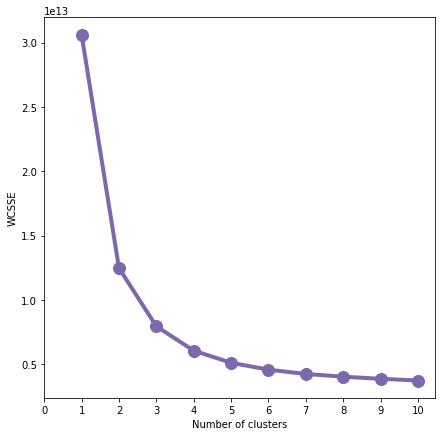

In [65]:
WCSS = []
for i in tqdm(range(1,11)):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(dfTwo)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = '#7D68AD')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSSE")
plt.show()

In [70]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
dfOne['cluster'] = model.fit_predict(dfTwo)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [71]:
dfOne['winLose'] = winLose

In [72]:
dfOne

,p1_kill,p1_death,p1_assist,p1_kill participation,p1_kda,p1_damage dealt,p1_damage taken,p1_control ward,p1_warding,p1_ward removed,...,p5_kda,p5_damage dealt,p5_damage taken,p5_control ward,p5_warding,p5_ward removed,p5_total cs,p5_cs per minute,winLose,cluster
0,16.0,4.0,3.0,54.0,4.75,34721.0,45237.0,2.0,6.0,1.0,...,1.80,6799.0,14668.0,5.0,45.0,11.0,22.0,0.8,1,2
1,3.0,5.0,2.0,18.0,1.00,13543.0,17496.0,1.0,6.0,1.0,...,11.00,8182.0,11081.0,4.0,23.0,3.0,10.0,0.5,1,0
2,5.0,1.0,8.0,52.0,13.00,13516.0,13051.0,1.0,5.0,1.0,...,22.00,7951.0,9173.0,5.0,28.0,7.0,8.0,0.4,1,0
3,1.0,3.0,1.0,50.0,0.67,6847.0,15340.0,1.0,7.0,3.0,...,0.67,3741.0,6856.0,7.0,28.0,5.0,20.0,1.0,1,0
4,1.0,6.0,0.0,25.0,0.17,6140.0,10945.0,0.0,2.0,0.0,...,0.50,3724.0,7131.0,2.0,6.0,0.0,23.0,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123253,3.0,5.0,1.0,25.0,0.80,10438.0,18824.0,1.0,9.0,2.0,...,0.73,8613.0,20993.0,9.0,35.0,2.0,36.0,1.3,0,2
123254,0.0,4.0,0.0,0.0,0.00,8613.0,20668.0,2.0,9.0,5.0,...,0.80,4044.0,13125.0,4.0,18.0,2.0,11.0,0.5,0,2
123255,1.0,4.0,3.0,13.0,1.00,9550.0,11755.0,1.0,6.0,0.0,...,7.67,7867.0,6743.0,8.0,26.0,5.0,8.0,0.3,0,2
123256,0.0,5.0,3.0,18.0,0.60,11483.0,19572.0,2.0,6.0,2.0,...,0.83,9394.0,25690.0,0.0,6.0,2.0,18.0,0.9,0,2
